## Assignment Task: Path Interpolation and Visualization

In this exercise, you are provided with a CSV file named `loop_track_waypoints.csv`, which contains a sequence of indexed 2D waypoints that form a closed-loop track. Your task is to interpolate these waypoints to generate a smooth continuous path and visualize the resulting curve.

### Dataset Description

The CSV file contains the following columns:

- `Index`: An integer representing the order of the waypoint.
- `x`: The x-coordinate of the waypoint (in meters).
- `y`: The y-coordinate of the waypoint (in meters).

The track is closed, i.e., the final waypoint coincides with the starting point to form a loop.

### Objectives

1. **Read** the CSV file using an appropriate data processing library such as `pandas`.
2. **Perform interpolation** over the waypoints using a method of your choice (e.g., `scipy.interpolate` or spline interpolation).
3. **Visualize** both the original discrete waypoints and the resulting smooth curve on the same plot for comparison.
4. Ensure the interpolated path **preserves the closed-loop nature** of the track.

### Recommended Libraries

You may use the following libraries:
- `pandas` for reading the CSV file.
- `matplotlib` or `plotly` for visualization.
- `scipy.interpolate` (e.g., `splprep` and `splev`) or `interp1d` for interpolation.

### 📌 Instructions

- Ensure that the file `loop_track_waypoints.csv` is placed in the **same directory** as this notebook.
- Label your axes and add a legend to your plot.
- Comment your code appropriately to explain the logic and steps used.
- Try using both linear and spline-based interpolation methods if time permits.


/home/ansh/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ansh/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


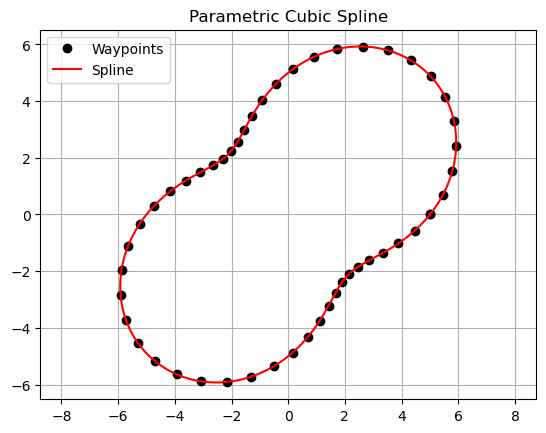

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

# Load and extract data
df = pd.read_csv("loop_track_waypoints.csv")
points = df[["X", "Y"]].to_numpy()
X = points[:, 0]
Y = points[:, 1]

# Parametric t
t = np.linspace(0, 1, len(X))

# Parametric cubic splines
cs_x = CubicSpline(t, X)
cs_y = CubicSpline(t, Y)

# Interpolated values
t_fine = np.linspace(0, 1, 500)
x_fine = cs_x(t_fine)
y_fine = cs_y(t_fine)

# Plot
plt.plot(X, Y, 'ko', label='Waypoints')
plt.plot(x_fine, y_fine, 'r-', label='Spline')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Parametric Cubic Spline")
plt.show()